# Checkout simulated date

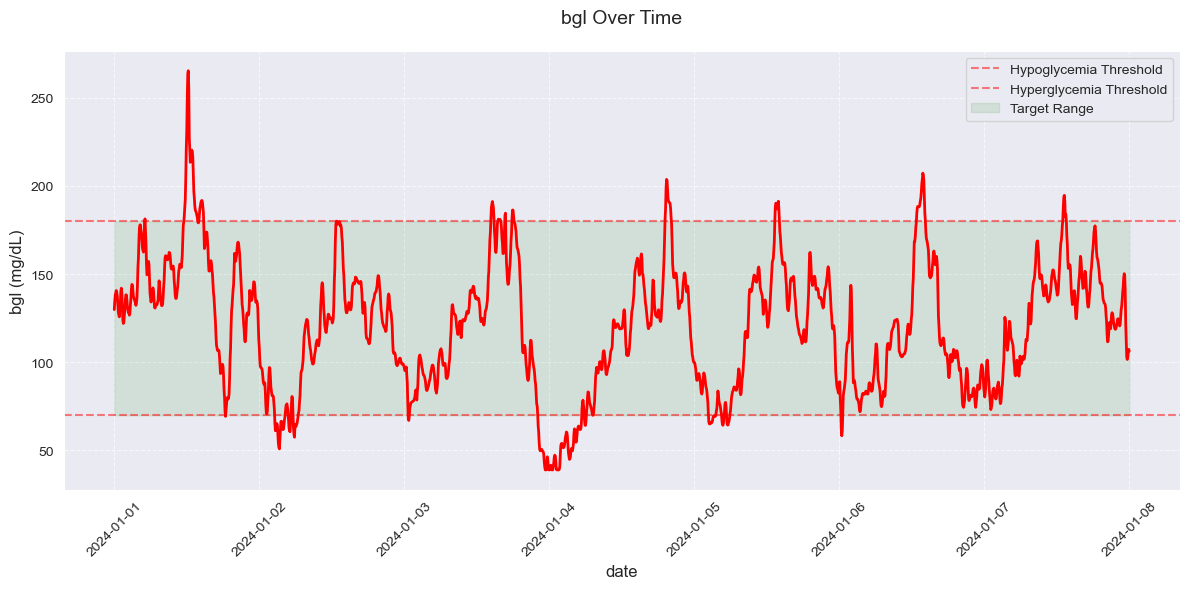

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.read_csv('../data/interim/2024-11-18_adu001__i5mins_d4hrs_c5g_l2hrs_n3.csv')

df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])  # Second column is bgl

# Set style
fig, ax = plt.subplots(figsize=(12, 6))

# Create the plot
ax.plot(df['date'], df["bgl"], 'r', linewidth=2)

# Customize the plot
ax.set_title(f'bgl Over Time', fontsize=14, pad=20)
ax.set_xlabel(df.columns[0], fontsize=12)
ax.set_ylabel(f'bgl (mg/dL)', fontsize=12)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Set y-axis range to include important thresholds
ax.axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Hypoglycemia Threshold')
ax.axhline(y=180, color='r', linestyle='--', alpha=0.5, label='Hyperglycemia Threshold')
ax.fill_between(df[df.columns[0]], 70, 180, alpha=0.1, color='green', label='Target Range')

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

## Gamma Distribution


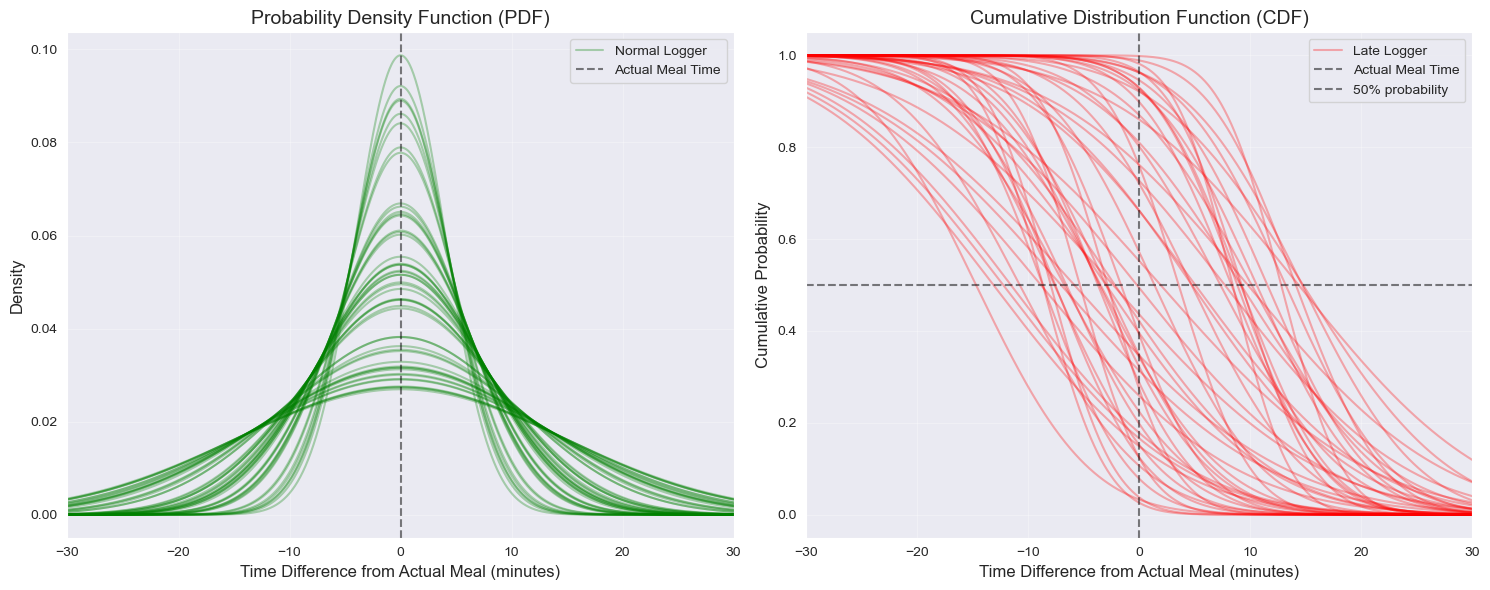

In [235]:
import random
from scipy.stats import gamma, norm
import numpy as np
from matplotlib import pyplot as plt

def generate_meal_logging_distribution(direction='right'):
    """
    Generate distribution parameters with internal direction handling randomly.
    TODO: Spread should be params
    Parameters
    ----------
    direction: 'right', 'left', or 'normal'

    Returns
    -------
    For normal: (mean, std, distribution_object)
    For skewed: (shape, scale, offset, distribution_object)
    """
    if direction == 'normal':
        mean = random.uniform(-15, 15)  # TODO: Should be a param
        std = random.uniform(4, 15)  # TODO: Should be a param
        return mean, std, norm(mean, std)

    else:
        if direction == 'left':  # Late logger
            # More extreme parameters for late logging
            shape = random.uniform(2, 4)  
            scale = random.uniform(2.5, 3) 
            offset = random.uniform(10, 30) # Shift right 10 to 30 mins late

        else:  # Early logger
            shape = random.uniform(1, 3) 
            scale = random.uniform(3, 3.5)
            offset = random.uniform(10, 15) # Shift left 10 to 15 mins early

        return shape, scale, offset


def plot_random_distributions(direction='left'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    x = np.linspace(-30, 30, 1000)
    n_samples = 50
    
    if direction == 'normal':
        for i in range(n_samples):
            mean, std, _ = generate_meal_logging_distribution(direction)
            pdf = norm.pdf(x, scale=std)
            ax1.plot(x, pdf, 'g-', alpha=0.3, label='Normal Logger' if i == 0 else "")
            
            cdf = norm.cdf((-x), loc=mean, scale=std)
            ax2.plot(x, cdf, 'r-', alpha=0.3, label='Late Logger' if i == 0 else "")
    
    elif direction == 'left':
        # Plot late loggers
        for i in range(n_samples):
            shape, scale, offset = generate_meal_logging_distribution('left')
            # Plot PDF
            pdf = gamma.pdf((-x + offset), a=shape, scale=scale)
            ax1.plot(x, pdf, 'r-', alpha=0.3, label='Late Logger' if i == 0 else "")
    
            # Plot CDF
            cdf = gamma.cdf((-x + offset), a=shape, scale=scale)
            ax2.plot(x, cdf, 'r-', alpha=0.3, label='Late Logger' if i == 0 else "")
    else:
        # Plot early loggers
        for i in range(n_samples):
            shape, scale, offset = generate_meal_logging_distribution('right')
            # Plot PDF
            pdf = gamma.pdf((x + offset), a=shape, scale=scale)
            ax1.plot(x, pdf, 'b-', alpha=1, label='Early Logger' if i == 0 else "")
    
            # Plot CDF
            cdf = gamma.cdf((x + offset), a=shape, scale=scale)
            ax2.plot(x, cdf, 'b-', alpha=1, label='Early Logger' if i == 0 else "")


    
    ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Actual Meal Time')
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Actual Meal Time')
    ax2.axhline(y=0.5, color='k', linestyle='--', alpha=0.5, label='50% probability')
    
    
    # PDF
    ax1.set_title('Probability Density Function (PDF)', fontsize=14)
    ax1.set_xlabel('Time Difference from Actual Meal (minutes)', fontsize=12)
    ax1.set_ylabel('Density', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    ax1.set_xlim(-30, 30)
    
    # CDF
    ax2.set_title('Cumulative Distribution Function (CDF)', fontsize=14)
    ax2.set_xlabel('Time Difference from Actual Meal (minutes)', fontsize=12)
    ax2.set_ylabel('Cumulative Probability', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)
    ax2.set_xlim(-30, 30)
    
    plt.tight_layout()
    plt.show()

plot_random_distributions(direction='normal')
# plot_random_distributions(direction='left')
# plot_random_distributions(direction='right')